# Basic of convolution 2D

If we want to claasify some sort of pictures or video, CNN is one of popular method

In this notebook I made the basic code of convolution

The following cells are implemented how Convnet process 2d(gray_sclae) image

The reference of this note book is from <a href ="https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381">Samrat Sahoo's median</a> really appreciate to his nice work.

In [1]:
#import lib and images
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('alex-iby-cNgsAdd4-m4-unsplash.jpg')
image_2 = cv2.imread('jonathan-riley-VW8MUbHyxCU-unsplash.jpg')

## Let's see which image we have

I picked two image which has many vertical & horizontal lines simultaneously

findfont: Font family ['NanumBarunpenRegular'] not found. Falling back to DejaVu Sans.


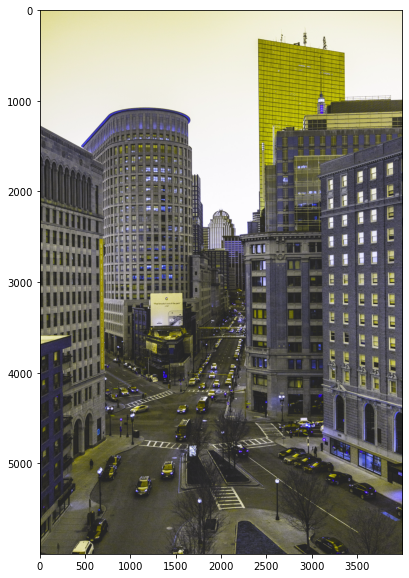

In [2]:
plt.figure(figsize=(16,10))
plt.imshow(image)

plt.show()

In [3]:
#convert BGR to GRAY
gray_scale = cv2.cvtColor(src = image, code=cv2.COLOR_BGR2GRAY)
gray_scale_2 = cv2.cvtColor(src = image_2, code=cv2.COLOR_BGR2GRAY)

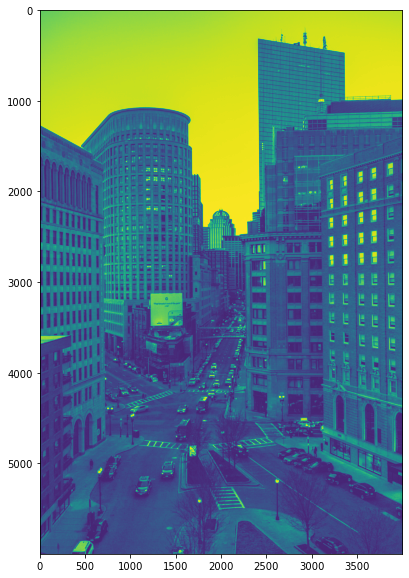

In [4]:
plt.figure(figsize=(16,10))
plt.imshow(gray_scale)

plt.show()

# padding experiment

In [5]:
image_padded = np.zeros((image.shape[0] + 100 * 2, image.shape[1] + 100 * 2))
image_padded[100: -100, 100: -100] = gray_scale

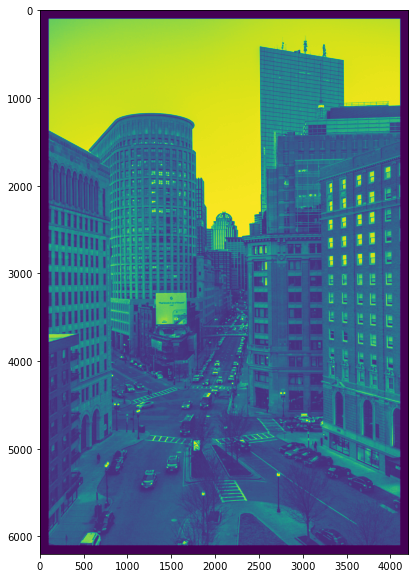

In [6]:
plt.figure(figsize=(16,10))
plt.imshow(image_padded)

plt.show()

In [7]:
kernel_1 = np.array([[-1, -1, -1], [1, 1, 1], [-1, -1, -1]])
kernel_2 = np.array([[-1, -1, -1], [-1, 10, -1], [-1, -1, -1]])

In [8]:
def convolution(image, kernel, padding = 0, strides = 1):
    kernel = np.flipud(np.fliplr(kernel))
    
    image_x_size = image.shape[0]
    image_y_size = image.shape[1]
    kernel_x_size = kernel.shape[0]
    kernel_y_size = kernel.shape[1]
    
    
    x_out = int(((image_x_size + 2 * padding - kernel_x_size)/strides) + 1)
    y_out = int(((image_y_size + 2 * padding - kernel_y_size)/strides) + 1)
    
    output_image = np.zeros((x_out, y_out))
    print(output_image.shape)
    if padding != 0:
        padded_image = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
        padded_image[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        
    else:
        padded_image = image
        
    
    
    for y_pointer in range(padded_image.shape[1]):
        
        if y_pointer > padded_image.shape[1] - kernel_y_size:
            break
        if y_pointer % strides == 0:

            for x_pointer in range(padded_image.shape[0]):
                if x_pointer > padded_image.shape[0] - kernel_x_size:

                    break
                try:
                    if x_pointer & strides == 0:
                        output_image[x_pointer, y_pointer] = (kernel * padded_image[x_pointer: x_pointer + kernel_x_size,
                                                                   y_pointer: y_pointer + kernel_y_size]).sum()

                except:
                    break
                    
    plt.figure(figsize = (15,20))
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.subplot(1,3,2)
    plt.imshow(padded_image)
    plt.subplot(1,3,3)
    plt.imshow(output_image)
    
    return output_image

            

(6018, 4018)


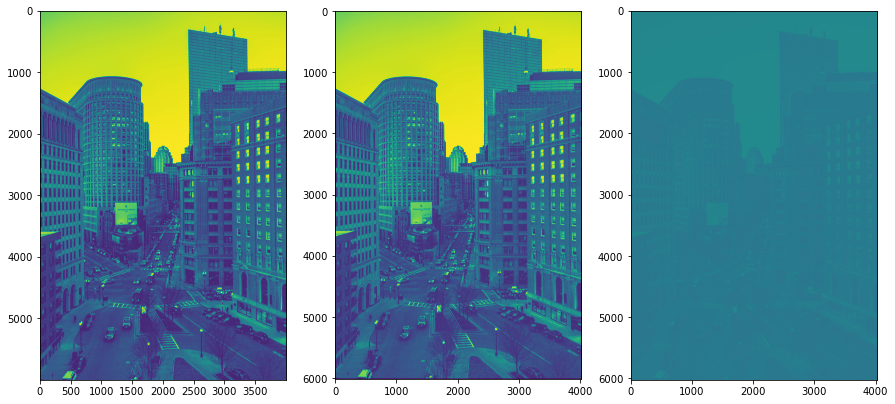

In [9]:
output_1 = convolution(gray_scale,kernel_2,padding= 10)

In [10]:
kernel_3 = np.array([[3, 3, 3],[-1, -1, -1],[3, 3, 3]])
gaussian = cv2.getGaussianKernel(3,3)
gaussian = np.outer(gaussian, gaussian.T)

(3011, 5198)


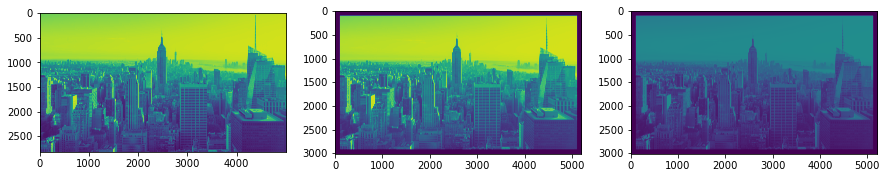

In [11]:
output_2 = convolution(gray_scale_2, gaussian, padding = 100)

In [12]:
cv2.imwrite('kernel_1.jpg', output_1)
cv2.imwrite('kernel_2.jpg', output_2)

True

# Maxpooling 

In [13]:
def max_pooling_2d_valid(input_2d,max_pool_size = (2,2)):
    x_pool = max_pool_size[0]
    y_pool = max_pool_size[1]
    
    x_image_size = input_2d.shape[0]
    y_image_size = input_2d.shape[1]
    
    x_output = int(x_image_size/ x_pool)
    y_output = int(y_image_size/ y_pool)
    
    output = np.zeros((x_output, y_output))
    
    for y_pointer in range(y_image_size):
        if y_pointer > y_image_size - y_pool:
            break
        
        if y_pointer % y_pool == 0:
            for x_pointer in range(x_image_size):
                if x_pointer > x_image_size - x_pool:
                    break

                if x_pointer % x_pool == 0:
                    try:
                        output[int(x_pointer/x_pool), int(y_pointer/y_pool)] = input_2d[x_pointer: x_pointer + x_pool,
                                                                                        y_pointer: y_pointer + y_pool].max()

                    except:
                        break
                        
    return output
            
        
        
        

In [14]:
max_pooled_image_2 = max_pooling_2d_valid(output_2)

findfont: Font family ['NanumBarunpenRegular'] not found. Falling back to DejaVu Sans.


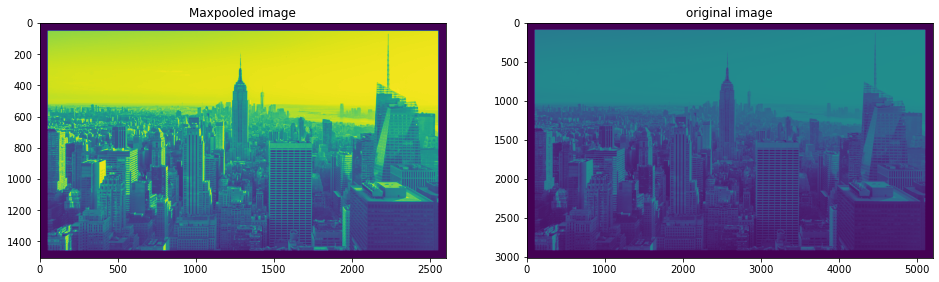

In [15]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.imshow(max_pooled_image_2)
plt.title('Maxpooled image')
plt.subplot(1,2,2)
plt.imshow(output_2)
plt.title('original image')

plt.show()

# convolution 3D

In [16]:
def convolution3D(image, kernel, padding = 0, strides = 1):
    B, G, R = cv2.split(image)
    
    R_conved = convolution(R, kernel, padding, strides)
    G_conved = convolution(G, kernel, padding, strides)
    B_conved = convolution(B, kernel, padding, strides)
    
    print(R_conved.shape, G_conved.shape, B_conved.shape)
    conved_image = cv2.merge([R_conved, G_conved, B_conved]).astype(int)
    print(conved_image.shape)
    
    return conved_image

(2811, 4998)
(2811, 4998)
(2811, 4998)
(2811, 4998) (2811, 4998) (2811, 4998)
(2811, 4998, 3)


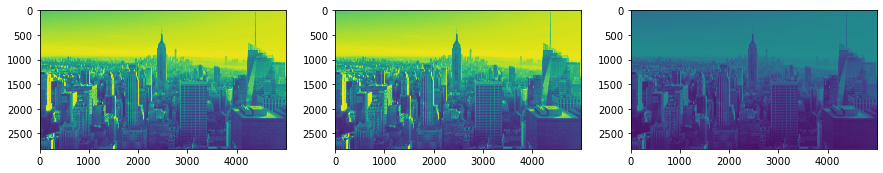

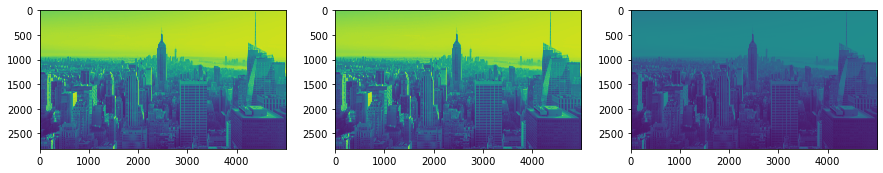

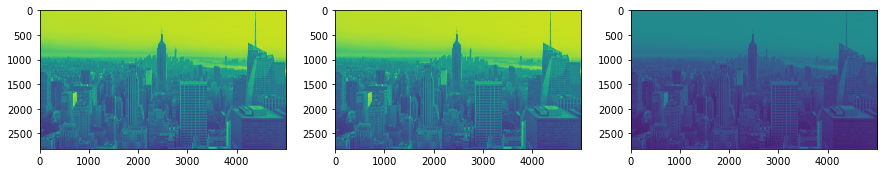

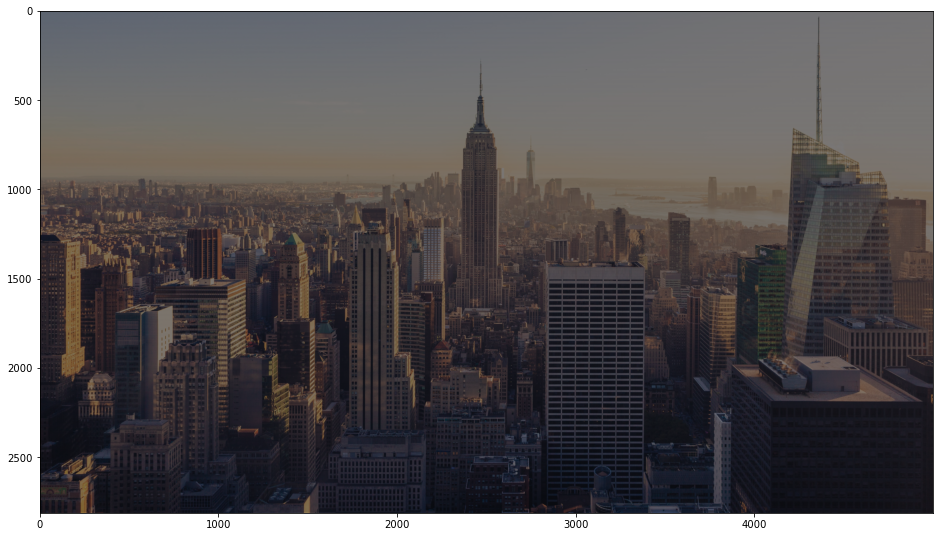

In [17]:
conved_3d = convolution3D(image_2, gaussian)

plt.figure(figsize=(16, 10))
plt.imshow(conved_3d)

In [18]:
def maxpooling_3d_valid(image, max_pool_size = (2,2)):
    B, G, R = cv2.split(image)
    
    B_maxpool = max_pooling_2d_valid(B, max_pool_size)
    G_maxpool = max_pooling_2d_valid(G, max_pool_size)
    R_maxpool = max_pooling_2d_valid(R, max_pool_size)
    
    max_pooled_image = cv2.merge([B_maxpool, G_maxpool, R_maxpool]).astype(int)
    
    return max_pooled_image

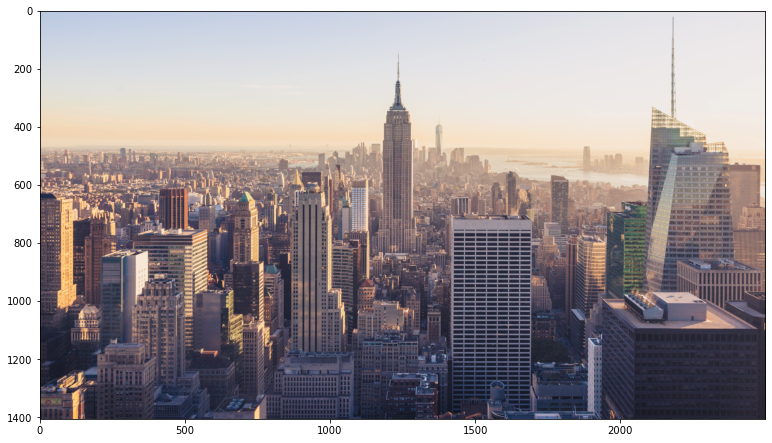

In [19]:
max_pooled_3d_image = maxpooling_3d_valid(conved_3d)

plt.figure(figsize=(13,10))
plt.imshow(max_pooled_3d_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


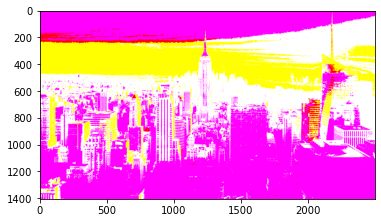

In [20]:
from scipy.fftpack import dct

plt.imshow(dct(max_pooled_3d_image))